# Stock price prediction

In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
!pip install statistics
!pip install statsmodels
!pip install sklearn


In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('Brent Spot Price.csv')

In [6]:
df=df.rename(columns={'Unnamed: 0': 'Month'},inplace=False)

In [7]:
df.index=df.Month
df.drop(df.columns[0],axis=1,inplace=True)

In [8]:
df=df.rename(columns={'Brent crude oil spot price, Monthly (dollars per barrel)': 'Price'},inplace=False)

In [9]:
df.head()

,Price
Month,
1990 01,21.251
1990 02,19.813
1990 03,18.387
1990 04,16.612
1990 05,16.352


<AxesSubplot:xlabel='Month'>

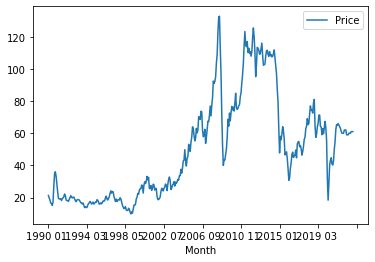

In [10]:

df.plot()

In [11]:
df.Price.describe()


count    396.000000
mean      49.661245
std       31.566252
min        9.824000
25%       20.254750
50%       44.737000
75%       67.236500
max      132.718000
Name: Price, dtype: float64

In [12]:
21.215-49.661/(31.566)

19.64175663688779

## Checking whether the given data set is stationary or not using 
### What is stationarity ?
A time series whose statistical properties, such as mean, variance, etc., remain constant over time, are called a stationary time series.<br>
In practical most of he timeseries will not be stationary , in order to find whether a given series is statioary or not we can use two test :<br>
* ADF Test (Augumented Dickey Fuller Test <br>
* KPSS Test(Kwiatkowski-Phillips-Schmidt-Shin test)  <br>

### ADFuller test
ADF Augumented Dickey Fuller test is a common statistical test used to test whether a given timeseries is stationary or not.<br>
#### Unit Root  
ADF test belong to the category of Unit Root Test which is the proper method for testing stationarity of series.Unit root is a characteristics of time series which makes it non staionary. <br>

#### Dickey Fuller Test 
Before going into ADF test, let’s first understand what is the Dickey-Fuller test. A Dickey-Fuller test is a unit root test that tests the mull hypothesis that α=1 in the following model equation. alpha is the coefficient of the first lag on Y. Null Hypothesis (H0): alpha=1 <br>
**Y <sup>t</sup>= alpha  Y <sub>t-1</sub> + E** <bR>
    Where  ,<br>
    alpha is the coefficeint that defines the unit root <br>
    Y<sub>t</sub> is the variable of interest at time t <br>
    E is the error <br>
<br>
    For Regression <br>
    **delta Y = (alpaha -1) Y<sub>t-1</sub>+ E** <br>
    
  Where delta is the diffferne in the operator
    
#### ADF Test
    * The augmented dickey- fuller test is an extension of the dickey-fuller test, which removes autocorrelation from the series and then tests similar to the procedure of the dickey-fuller test. <br>
    * The augmented dickey fuller test works on the statistic, which gives a negative number and rejection of the hypothesis depends on that negative number; the more negative magnitude of the number represents the confidence of presence of unit root at some level in the time series.<br>
    * If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(HO) i.e., time series does not have a unit root, meaning it is stationary. It does not have a time-dependent structure.<br>
    
####  KPSS Test(Kwiatkowski-Phillips-Schmidt-Shin test)
   * KPSS test is a statistical test to check for stationarity of a series around a deterministic trend. Like ADF test, the KPSS test is also commonly used to analyse the stationarity of a series. However, it has couple of key differences compared to the ADF test in function and in practical usage.<br>
   *  A common misconception, however, is that it can be used interchangeably with the ADF test. This can lead to misinterpretations about the stationarity, which can easily go undetected causing more problems down the line<br>
   * A key difference from ADF test is the null hypothesis of the KPSS test is that the series is stationary. So practically, the interpretaion of p-value is just the opposite to each other. That is, if p-value is less than signif level (say 0.05), then the series is non-stationary. Whereas in ADF test, it would mean the tested series is stationary. <br>
  *A major difference between KPSS and ADF tests is the capability of the KPSS test to check for stationarity in the ‘presence of a deterministic trend’.  But what is a ‘deterministic trend’? The word ‘deterministic’ implies the slope of the trend in the series does not change permanently. That is, even if the series goes through a shock, it tends to regain its original path.<br>
  * overall  if a series is stationary according to the KPSS test by setting regression='ct' and is not stationary according to the ADF test, it means the series is stationary around a deterministic trend and so is fairly easy to model this series and produce fairly accurate forecasts. 

In [104]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(timeseries):
    print('Result of ADFuller Test :')
    dftest= adfuller(timeseries )
    dfoutput=pd.Series(dftest[0:3],index=['Test Statistics' , 'p-value' , 'Lag used '])
    print(dfoutput)
adfuller_test(df['Price'])

Result of ADFuller Test :
Test Statistics   -2.366208
p-value            0.151502
Lag used           1.000000
dtype: float64


In [23]:
from statsmodels.tsa.stattools import kpss

In [26]:

dftest= kpss(df['Price'] )
dfoutput=pd.Series(dftest[0:2],index=['Test Statistics' , 'p-value' ])
print(dfoutput)


Test Statistics    1.941507
p-value            0.010000
dtype: float64


/home/local/ZOHOCORP/bharath-12053/Desktop/TSA/jupyterenv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In the above the result the p-value is above 0.05 for adf test and less than  0.05 for kpss test so the above data is non stationary we have to convert it to stationary inorder to forecast values

## Making a time series stationary

### Differencing
In this method we compute the differnce of consecutive terms in the series.Differencing is performed to get rid of varying mean. Mathematically differencing can be written as :

***yt‘ = yt – y(t-1)***

Where yt is the value at time t.

<AxesSubplot:xlabel='Month'>

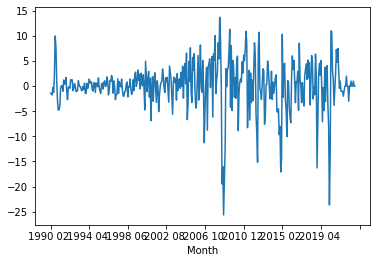

In [27]:
df['diff_1']=df['Price']- df['Price'].shift(1)
df['diff_1'].dropna().plot()

In [28]:
dum_data= df.dropna()

In [29]:
adfuller_test(dum_data['diff_1'])

Result of ADFuller Test :
Test Statistics      -1.328738e+01
p-value               7.480882e-25
Lag used              0.000000e+00
 No of Observatons    3.940000e+02
dtype: float64


### Seasonal difference 
In seasonal difference instead of calculating the differcne between consecutive values, we calculate the difference between an observation and a previous observation from the same season. For example observations of monday alone 

***yt‘ = yt – y(t-n)***


In [30]:
df['diff_12']= df['Price']-df['Price'].shift(12)

In [31]:
adfuller_test(df['diff_12'].dropna())

Result of ADFuller Test :
Test Statistics        -4.224748
p-value                 0.000598
Lag used               15.000000
 No of Observatons    368.000000
dtype: float64


<AxesSubplot:xlabel='Month'>

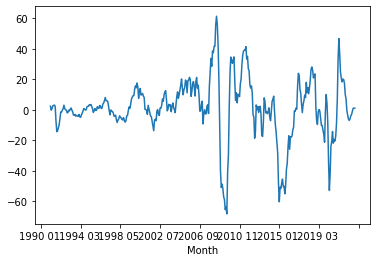

In [32]:
df['diff_12'].plot()

### Log Transformation
Transformation used to stabilize the non constant variance of a series . Let's do log and diferncing on our data set.

<AxesSubplot:xlabel='Month'>

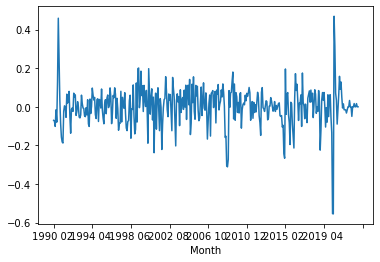

In [33]:
df['Log']=np.log(df['Price'])
df['log_diff']=df['Log']-df['Log'].shift(1)
df['log_diff'].dropna().plot()

In [34]:
adfuller_test(df['log_diff'].dropna())

Result of ADFuller Test :
Test Statistics      -1.354491e+01
p-value               2.472268e-25
Lag used              1.000000e+00
 No of Observatons    3.930000e+02
dtype: float64


# Models for forecasting

## Naive / Persistance Model
In Naive we can assume that the last period is the forecast value of this time period.This model is very important because incase if our other models cant able to give Mean Square Error less tham this model the we can assume that the datas in this model is not a proper data . That is the given data is random walk


In [35]:
    #    df.index.size-
    df.index.size *0.2

79.2

In [36]:
df.head()

,Price,diff_1,diff_12,Log,log_diff
Month,,,,,
1990 01,21.251,NaN,NaN,3.056404,NaN
1990 02,19.813,-1.438,NaN,2.986338,-0.070066
1990 03,18.387,-1.426,NaN,2.911644,-0.074694
1990 04,16.612,-1.775,NaN,2.810125,-0.101519
1990 05,16.352,-0.260,NaN,2.794350,-0.015775


In [37]:
df['Price_lag']=df['Price'].shift(1)
df.drop(df.columns[2], axis=1 , inplace=True)
df.head()

,Price,diff_1,Log,log_diff,Price_lag
Month,,,,,
1990 01,21.251,NaN,3.056404,NaN,NaN
1990 02,19.813,-1.438,2.986338,-0.070066,21.251
1990 03,18.387,-1.426,2.911644,-0.074694,19.813
1990 04,16.612,-1.775,2.810125,-0.101519,18.387
1990 05,16.352,-0.260,2.794350,-0.015775,16.612


In [38]:
train ,test = df[1:df.shape[0]-80],df[df.shape[0]-80:]

In [39]:
test.head(10)

,Price,diff_1,Log,log_diff,Price_lag
Month,,,,,
2016 05,46.742,5.159,3.844643,0.116952,41.583
2016 06,48.247,1.505,3.876334,0.031691,46.742
2016 07,44.952,-3.295,3.805595,-0.070738,48.247
2016 08,45.843,0.891,3.825223,0.019627,44.952
2016 09,46.568,0.725,3.840914,0.015691,45.843
2016 10,49.522,2.954,3.902417,0.061503,46.568
2016 11,44.734,-4.788,3.800734,-0.101683,49.522
2016 12,53.289,8.555,3.975730,0.174996,44.734
2017 01,54.577,1.288,3.999613,0.023883,53.289


In [40]:
train_X , train_Y = train['Price_lag'] , train['Price']
test_X ,test_Y = test['Price_lag'] , test['Price']

In [41]:
prediction = test_X.copy()
test_Y.head()


Month
2016 05     46.742
2016 06     48.247
2016 07     44.952
2016 08     45.843
2016 09     46.568
Name: Price, dtype: float64

In [42]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(test_Y , prediction)
mse

27.007918212499998

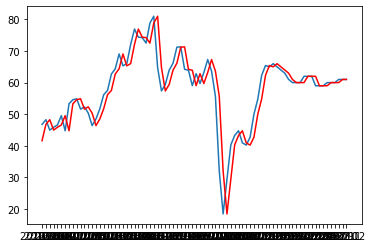

In [43]:
from matplotlib import pyplot
pyplot.plot(test_Y)
pyplot.plot(prediction, color="red")

## Auto Regression Model

A regresssion model such as linear regression models an output value based on a linear combination of input values 
	
**y' = b0 + b1 * X1** </br>
where **y'** is the prediction </br>
      **b0,b1** are the coefficient fount by optimizing the model</br>
      **X1** is an input value</br>
This Technique can also be used in timeseries where input variables are taken as observations of previos time steps ,called lag variables.</br>
	
**X(t+1) = b0 + b1*X(t-1) + b2*X(t-2)** </br>
where **t** is the time period,</br>
      **X** is the input valus</br>
Since the regression model uses its own lagged value it is known as auto regression model.

In [48]:

from statsmodels.tsa.ar_model import AutoReg

In [49]:
df_1 = pd.read_csv('Brent Spot Price.csv')
df_1=df_1.rename(columns={'Brent crude oil spot price, Monthly (dollars per barrel)': 'Price'},inplace=False)
train ,test = df_1.Price[1:df_1.shape[0]-80],df_1[df_1.shape[0]-80:]

In [50]:
plot_pacf(train_Y )


NameError: name 'plot_pacf' is not defined

In [51]:
train_Y.head()

Month
1990 02     19.813
1990 03     18.387
1990 04     16.612
1990 05     16.352
1990 06     15.104
Name: Price, dtype: float64

In [52]:
train.shape


(315,)

In [53]:
model=AutoReg(train_Y,6)
model_fit = model.fit()

/home/local/ZOHOCORP/bharath-12053/Desktop/TSA/jupyterenv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [54]:
model_fit.params

const       0.661403
Price.L1    1.376153
Price.L2   -0.358298
Price.L3   -0.057000
Price.L4   -0.039876
Price.L5    0.070437
Price.L6   -0.004034
dtype: float64

In [55]:
predictions = model_fit.predict(start = len(train_Y) , end= len(train_Y)+len(test_Y)-1)

/home/local/ZOHOCORP/bharath-12053/Desktop/TSA/jupyterenv/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [56]:
print(predictions)

print(test_Y)

2016-05-01    43.635215
2016-06-01    44.358873
2016-07-01    44.320660
2016-08-01    44.175927
2016-09-01    44.080628
                ...    
2022-08-01    50.238655
2022-09-01    50.279851
2022-10-01    50.320268
2022-11-01    50.359921
2022-12-01    50.398824
Freq: MS, Length: 80, dtype: float64
Month
2016 05     46.742
2016 06     48.247
2016 07     44.952
2016 08     45.843
2016 09     46.568
             ...  
2022 08     60.000
2022 09     60.000
2022 10     61.000
2022 11     61.000
2022 12     61.000
Name: Price, Length: 80, dtype: float64


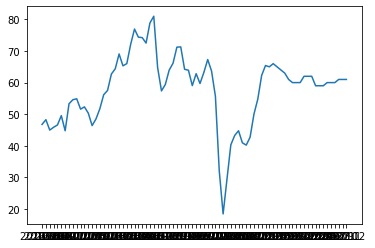

In [57]:
pyplot.plot(test_Y)

In [58]:
predictions.iloc[0]

43.63521547694577

In [59]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(test_Y, predictions.dropna())
mse

223.2690384134973

In [60]:
predictions=predictions.dropna()


In [61]:
    predictions.index= test_Y.index

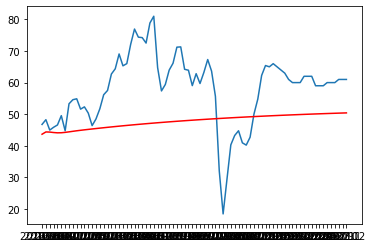

In [62]:
pyplot.plot(test_Y)
pyplot.plot(predictions, color="red")

## Walk forward 

In [63]:
train.head(10)

1     19.813
2     18.387
3     16.612
4     16.352
5     15.104
6     17.169
7     27.167
8     34.899
9     36.022
10    33.067
Name: Price, dtype: float64

In [64]:
data =train_Y
predict_list=[]
for t in test_Y:
    model=AutoReg(data,6)
    model_fit = model.fit()
    y= model_fit.predict(start = len(data) , end = len(data)+len(test_Y))
    print(y.values[0])
    predict_list.append(y.values[0])
    data=np.append(data, t)
   # print(data)
    data=pd.Series(data)
   

/home/local/ZOHOCORP/bharath-12053/Desktop/TSA/jupyterenv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/local/ZOHOCORP/bharath-12053/Desktop/TSA/jupyterenv/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


43.63521547694577
48.66827960113526
48.56003433475081
43.45061363066613
45.77638474434923
46.953516699002236
50.96978219403161
42.98231636788791
56.18603656800119
55.36948326518913
55.078517046800876
49.87716369967285
52.29735435759106
49.75210583008222
45.044252622444105
49.21511407186768
53.245375229305715
58.09902291432496
57.97670368908878
64.26047199133089
64.77369611480935
70.42943849501806
63.689327978709095
65.59802956788162
74.06885575859889
78.91291901661283
73.25731417495412
73.44006390608995
71.46520211867772
80.9552746122206
81.94465776585425
58.54837637936633
53.87393371086687
60.32830691395557
66.32681012877623
67.15562509989873
72.88572972350332
70.96252640290848
61.141336954085745
63.44377311491591
57.33836843527932
64.35255585909293
58.89606903109847
64.29977719674677
68.80291588066981
62.26543656112361
52.45653938821733
23.029273194375318
13.466904274479775
35.80295804174366
46.51330854169279
44.03863941905979
44.20458503950401
38.9372101694355
40.1009139543099
44.04

In [65]:
len(predict_list)

80

In [66]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(test_Y, predict_list)
mse

23.365525667629775

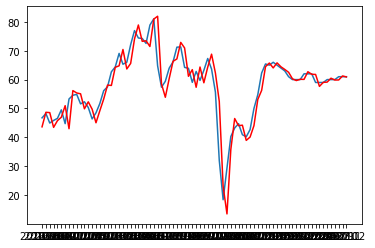

In [67]:
pyplot.plot(test_Y)
pyplot.plot(predict_list, color="red")

## Moving Average 
   * It very different from moving average smoothing method, in smoothing model we use windows size and make averages of the values. Whereas in Moving Average forecasting lets assume we have a time series and we use persistance and Auto regression model to forecast.
   * While forecasting by above moethods we use lagged values of Y. The Actual value Y = Y' +Residual .where the residual is the difference of Y and Y'.The REsidual will sometimes follow a patter we can use that and forecast the residuals . After forecasting the residuals we can add the residual with the Y' to get the Actual values Y.

In [68]:
ma_df =df.copy()
ma_df.head()
ma_df.index= pd.to_datetime(ma_df.index)

In [69]:
ma_df.drop(ma_df.columns[1:], axis=1, inplace=True)

In [70]:
ma_df['p']=ma_df['Price'].shift(1)

In [71]:
ma_df['Resid']=ma_df['Price']-ma_df['p']

In [72]:
ma_df=ma_df.dropna()

In [73]:
ma_df


,Price,p,Resid
Month,,,
1990-02-01,19.813,21.251,-1.438
1990-03-01,18.387,19.813,-1.426
1990-04-01,16.612,18.387,-1.775
1990-05-01,16.352,16.612,-0.260
1990-06-01,15.104,16.352,-1.248
...,...,...,...
2022-08-01,60.000,60.000,0.000
2022-09-01,60.000,60.000,0.000
2022-10-01,61.000,60.000,1.000


In [74]:
train_ma ,test_ma =ma_df[0:ma_df.shape[0]-80] , ma_df[ma_df.shape[0]-80:]

In [75]:
train_ma.drop(['Price','p'],axis=1,inplace=True)

/tmp/ipykernel_44107/3506367944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ma.drop(['Price','p'],axis=1,inplace=True)


In [76]:
test_ma.drop(['Price','p'],axis=1,inplace=True)

/tmp/ipykernel_44107/1113347028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ma.drop(['Price','p'],axis=1,inplace=True)


In [77]:
test_ma

,Resid
Month,
2016-05-01,5.159
2016-06-01,1.505
2016-07-01,-3.295
2016-08-01,0.891
2016-09-01,0.725
...,...
2022-08-01,0.000
2022-09-01,0.000
2022-10-01,1.000


In [78]:

from statsmodels.tsa.ar_model import AutoReg

In [79]:
model = AutoReg(train_ma ,12)
model_fit_ma = model.fit()

/home/local/ZOHOCORP/bharath-12053/Desktop/TSA/jupyterenv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [80]:
model_fit_ma.ar_lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [81]:
model_fit_ma.params

const        0.052382
Resid.L1     0.366819
Resid.L2     0.034158
Resid.L3    -0.039776
Resid.L4    -0.054233
Resid.L5     0.045616
Resid.L6    -0.116514
Resid.L7     0.021913
Resid.L8    -0.043442
Resid.L9    -0.124019
Resid.L10    0.093258
Resid.L11    0.090920
Resid.L12   -0.029816
dtype: float64

In [82]:
pred_resi_ma = model_fit_ma.predict(start= len(train_ma), end= len(train_ma)+len(test_ma)-1)

/home/local/ZOHOCORP/bharath-12053/Desktop/TSA/jupyterenv/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [83]:
prediction_values_ma = ma_df.p[ma_df.shape[0]-80:]+pred_resi_ma

In [84]:
prediction_values_ma

Month
2016-05-01    44.000114
2016-06-01    46.302435
2016-07-01    47.958398
2016-08-01    45.810432
2016-09-01    46.317066
                ...    
2022-08-01    60.069420
2022-09-01    60.069441
2022-10-01    60.069428
2022-11-01    61.069381
2022-12-01    61.069340
Length: 80, dtype: float64

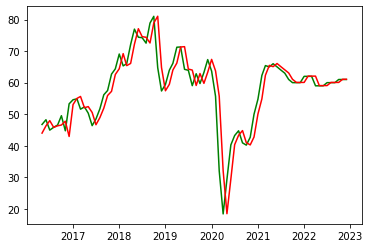

In [85]:
pyplot.plot(ma_df.Price[ma_df.shape[0]-80:],color="green")
pyplot.plot(prediction_values_ma, color="red")

In [86]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(ma_df.Price[ma_df.shape[0]-80:], prediction_values_ma)
mse

27.093425550668258

### Correlation 
   Relation between 2 variables.
    
| Coef. Value | Relationship | Inference |
| --- | --- | --- |
| +1 | Positive | If X increases Y also increases |
| -1 | Negative | If X increase Y decreases |
| 0 |  No Relationship | If X increases no effect on Y| 

But for Timesseries , instead of 2 different variables , we have a lagged values from one value,
So thereafter it is called as Auto Correlation => Correlation with itself

ρj^=∑Tt=j+1(yt−y¯)(yt−j−y¯)∑Tt=1(yt−y¯)2

## ARIMA
### Auto Regression Integrated Moving Average
In ARMA, the model cannot handle the trend,seasonality , whereas in ARIMA the model can handle trend (To handle season there is SARIMA)
Intergrated - to handle trend
It Integrates differencing method into ARMA to handle any types of series
#### step 1
Use differncing to remove trend
#### step 2
Use AR to do forecasting
#### step 3
Use MA on residuals to update the forecast
#### step 4
Add Trend and Seasonality to get the forecasted values

**Three parameters that are required while using arima model**
* P - Order of autoregression
    How many lag variable to choose.
    
* D - Order of Intergration 
    Number of differncing needed.
    
* Q - Order of Moving Average 
    What is the window size for Moving Average.

In [87]:
df_arima = pd.read_csv('Brent Spot Price.csv')

In [88]:
df_arima.head()

,Unnamed: 0,"Brent crude oil spot price, Monthly (dollars per barrel)"
0,1990 01,21.251
1,1990 02,19.813
2,1990 03,18.387
3,1990 04,16.612
4,1990 05,16.352


In [89]:
df_arima=df_arima.rename(columns={'Unnamed: 0':'Month','Brent crude oil spot price, Monthly (dollars per barrel)': 'Price'},inplace=False)

In [90]:
df_arima.tail()

,Month,Price
391,2022 08,60.0
392,2022 09,60.0
393,2022 10,61.0
394,2022 11,61.0
395,2022 12,61.0


<AxesSubplot:>

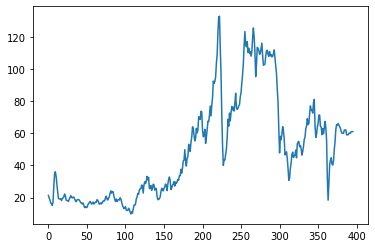

In [91]:
df_arima['Price'].plot()

The trend is quadratic so the D = 2

### Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

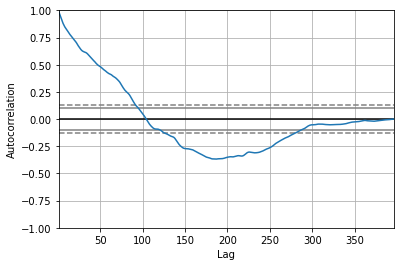

In [92]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_arima['Price'])

 p = 50 is the point before the confidence interval line 

### Partial Autocorrelation Function

In [93]:
from statsmodels.graphics.tsaplots import plot_pacf

/home/local/ZOHOCORP/bharath-12053/Desktop/TSA/jupyterenv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


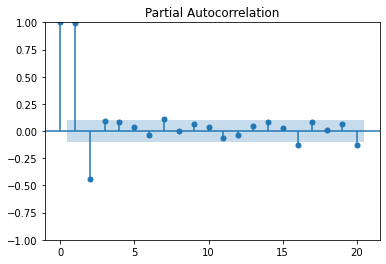

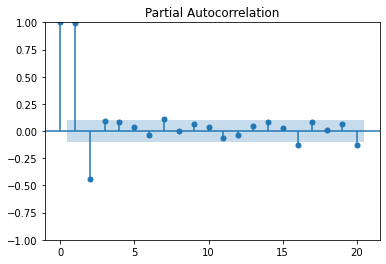

In [94]:
plot_pacf(df_arima['Price'],lags=20)

q=1


In [95]:
from statsmodels.tsa.arima.model import ARIMA

In [96]:
model_arima = ARIMA(df_arima['Price'], order=(80,2,1))

In [97]:
model_arima_fit = model_arima.fit()

/home/local/ZOHOCORP/bharath-12053/Desktop/TSA/jupyterenv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [98]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  396
Model:                ARIMA(80, 2, 1)   Log Likelihood               -1090.032
Date:                Thu, 24 Feb 2022   AIC                           2344.064
Time:                        18:37:44   BIC                           2670.124
Sample:                             0   HQIC                          2473.265
                                - 396                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1465      0.388      0.378      0.706      -0.614       0.907
ar.L2         -0.1868      0.210     -0.889      0.374      -0.599       0.225
ar.L3         -0.2611      0.212     -1.233      0.218      -0.676       0.154
ar.L4         -0.2623      0.243     -1.081      0.280      -0.738       0.213
ar.L5         -0.2106      0.267     -0.787      0.431      -0.735       0.314
ar.L6         -0.2792      0.269     -1.039      0.299      -0.806       0.247
ar.L7         -0.1565      0.289     -0.541      0.589      -0.724       0.411
ar.L8         -0.2594      0.255     -1.019      0.308      -0.758       0.240
ar.L9         -0.3183      0.276     -1.152      0.249      -0.860       0.223
ar.L10        -0.2380      0.304     -0.784      0.433      -0.833       0.357
ar.L11        -0.1653      0.300     -0.551      0.582      -0.754       0.423
ar.L12        -0.2198      0.265     -0.828      0.408      -0.740       0.301
ar.L13        -0.3607      0.270     -1.338      0.181      -0.889       0.168
ar.L14        -0.2930      0.315     -0.930      0.353      -0.911       0.325
ar.L15        -0.1348      0.329     -0.410      0.682      -0.779       0.510
ar.L16        -0.2420      0.283     -0.856      0.392      -0.796       0.312
ar.L17        -0.2440      0.267     -0.914      0.361      -0.767       0.279
ar.L18        -0.3721      0.281     -1.325      0.185      -0.923       0.178
ar.L19        -0.1720      0.337     -0.510      0.610      -0.833       0.489
ar.L20        -0.2139      0.296     -0.723      0.470      -0.794       0.366
ar.L21        -0.1960      0.274     -0.716      0.474      -0.733       0.341
ar.L22        -0.2517      0.267     -0.943      0.346      -0.775       0.272
ar.L23        -0.2626      0.267     -0.983      0.325      -0.786       0.261
ar.L24        -0.2650      0.281     -0.942      0.346      -0.816       0.286
ar.L25        -0.0607      0.290     -0.210      0.834      -0.629       0.507
ar.L26        -0.3403      0.233     -1.461      0.144      -0.797       0.116
ar.L27        -0.2563      0.271     -0.947      0.343      -0.787       0.274
ar.L28        -0.2556      0.287     -0.889      0.374      -0.819       0.308
ar.L29        -0.2003      0.289     -0.694      0.488      -0.766       0.366
ar.L30        -0.2246      0.274     -0.818      0.413      -0.762       0.313
ar.L31        -0.2765      0.270     -1.022      0.307      -0.807       0.254
ar.L32        -0.3052      0.276     -1.104      0.270      -0.847       0.237
ar.L33        -0.1065      0.311     -0.343      0.732      -0.716       0.503
ar.L34        -0.1976      0.254     -0.780      0.436      -0.694       0.299
ar.L35        -0.1933      0.241     -0.801      0.423      -0.666       0.280
ar.L36        -0.2711      0.241     -1.124      0.261      -0.744       0.201
ar.L37        -0.1639      0.257     -0.639      0.523      -0.667       0.339
ar.L38        -0.1771      0.252     -0.703      0.482      -0.671       0.317
ar

In [99]:
resid_arima = model_arima_fit.resid

<AxesSubplot:>

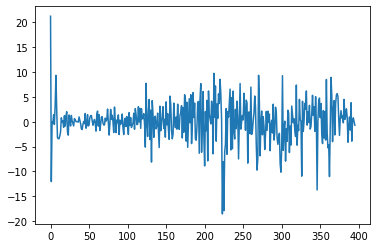

In [100]:
resid_arima.plot()

In [101]:
resid_arima.describe()

count    396.000000
mean       0.044159
std        3.977328
min      -18.566367
25%       -1.756126
50%        0.096216
75%        2.120338
max       21.251000
dtype: float64

In [102]:
output=model_arima_fit.forecast(10)

In [103]:
output

396    55.496484
397    54.321722
398    55.363313
399    55.756624
400    59.324865
401    59.972108
402    60.438183
403    58.499323
404    60.526388
405    59.947905
Name: predicted_mean, dtype: float64